In [1]:
import pandas as pd
import torch
import fastai
from fastai.vision.all import *
import cv2

In [2]:
# Path to the training data
path = Path('/content/drive/MyDrive/train')

In [3]:
# Get all image files from the directory
image_files = get_image_files(path)

In [4]:
# Verify images and remove any failed ones
failed_images = verify_images(image_files)
failed_images

(#0) []

In [5]:
# Create a DataBlock for loading and transforming the images
data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

In [6]:
# Create DataLoaders
data_loaders = data_block.dataloaders(path)

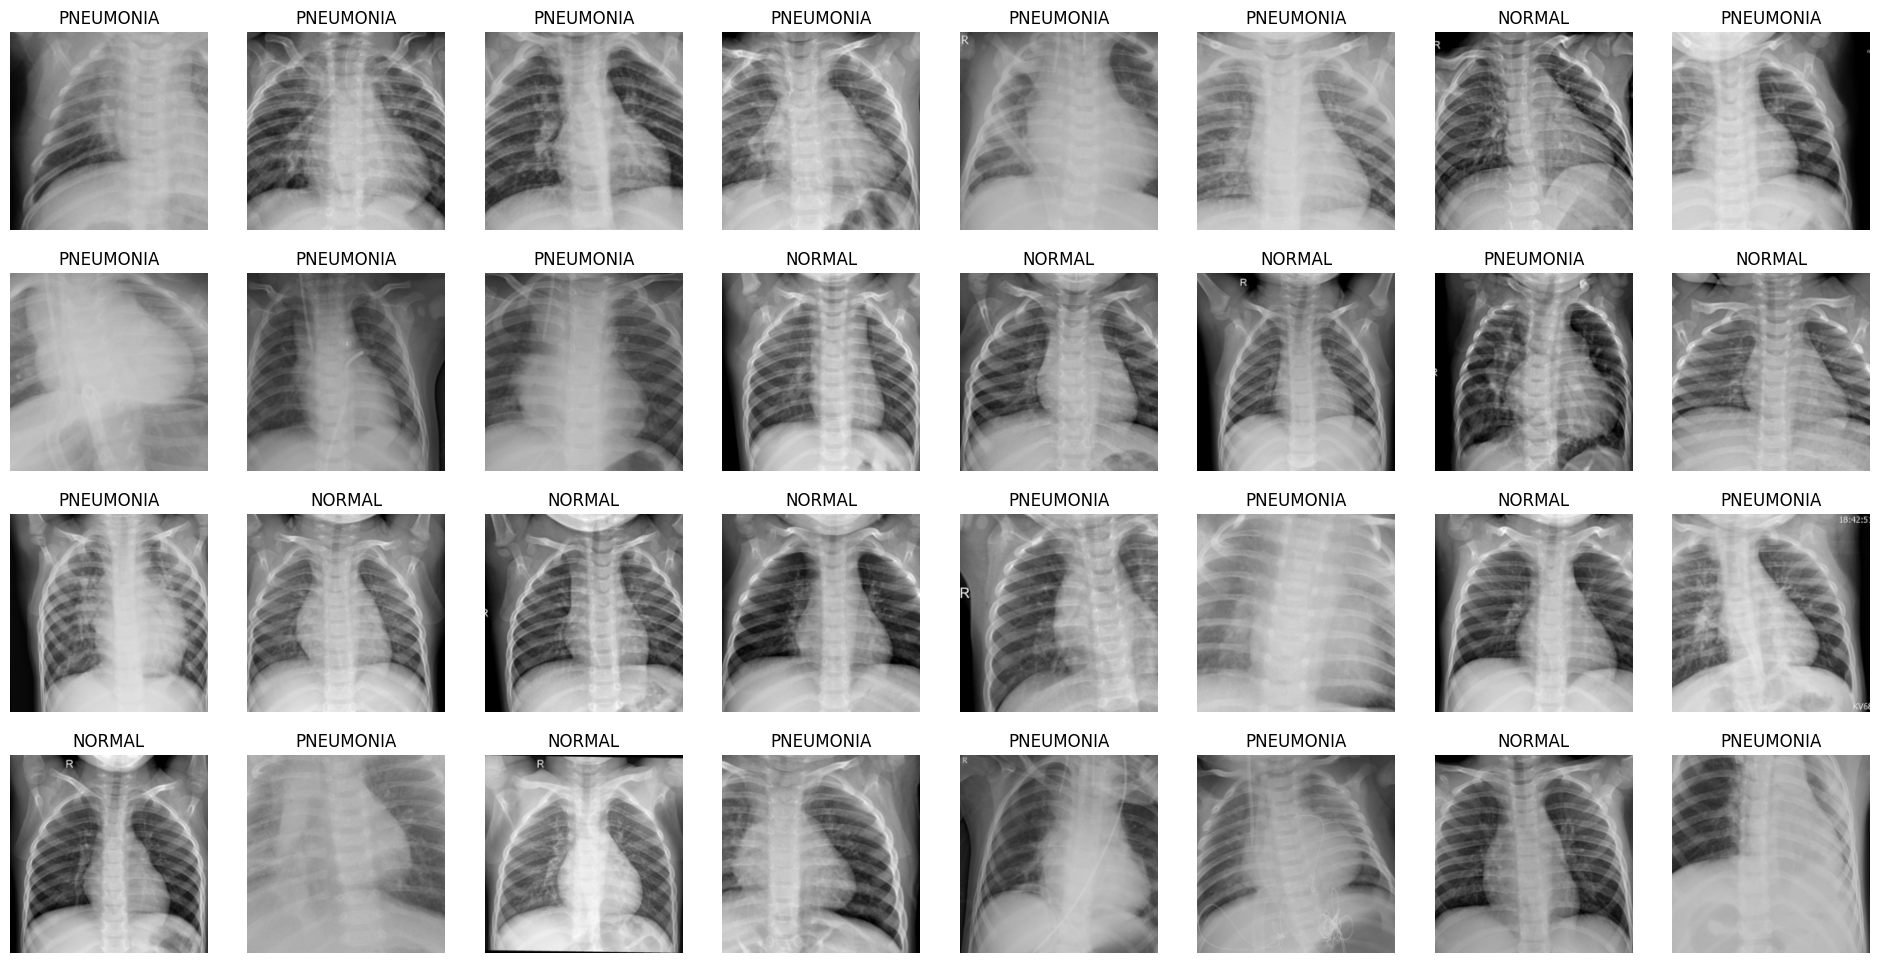

In [7]:
# Show a batch of training images
data_loaders.train.show_batch(max_n=32, nrows=4)

In [8]:
# Create a CNN learner using a ResNet34 model
learner = cnn_learner(data_loaders, resnet34, metrics=accuracy)

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 148MB/s]


In [9]:
# Fine-tune the model for 4 epochs
learner.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.455669,0.194112,0.937799,01:53


epoch,train_loss,valid_loss,accuracy,time
0,0.177683,0.157331,0.968421,02:00
1,0.093769,0.073703,0.977990,02:01
2,0.045889,0.052766,0.983732,02:01
3,0.027496,0.037567,0.986603,02:00


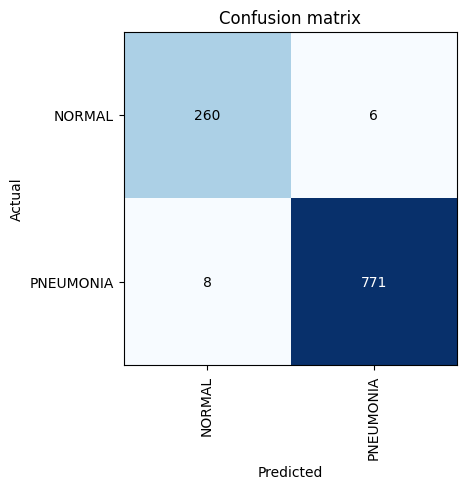

In [10]:
# Interpret the results and plot the confusion matrix
interpretation = ClassificationInterpretation.from_learner(learner)
interpretation.plot_confusion_matrix()

In [11]:
# Calculate and print the model's accuracy
accuracy_value = accuracy(*interpretation.learn.get_preds())
print(f"Model Accuracy: {accuracy_value:}")

Model Accuracy: TensorBase(0.9866)


In [12]:
# Path to the test data
test_path = Path('/content/drive/MyDrive/test')

In [13]:
# Get all test image files
test_images = get_image_files(test_path)

In [14]:
# Create a DataLoader for the test images
test_dl = learner.dls.test_dl(test_images)

In [15]:
# Get predictions for the test images
preds, _ = learner.get_preds(dl=test_dl)

In [16]:
# Convert predictions to labels (1 for pneumonia, 0 for normal)
pred_labels = preds.argmax(dim=1)

In [17]:
# Create a DataFrame with image names and predictions
results_df = pd.DataFrame({'filename': [img.name for img in test_images], 'label': pred_labels})

In [18]:
# Save results to a CSV file
results_df.to_csv('/content/drive/MyDrive/predictions.csv', index=False)